# BVLOS - VLOS collision Probability

## Assumptions

<p>This notebook estimates the probability of two small drones colliding at very low levels (VLL). We assume one drone is flying "blind" BVLOS and unable to sense or detect the drone flying random VLOS operations. Likewise we assume the VLOS flights cannot see or take maneuvering action against the BVLOS operation.</p>

<p>Let us assume a BLOVS flight is de-conflicted in "Amber" U-Space and must enter into a "Green" area of VLOS:</p>

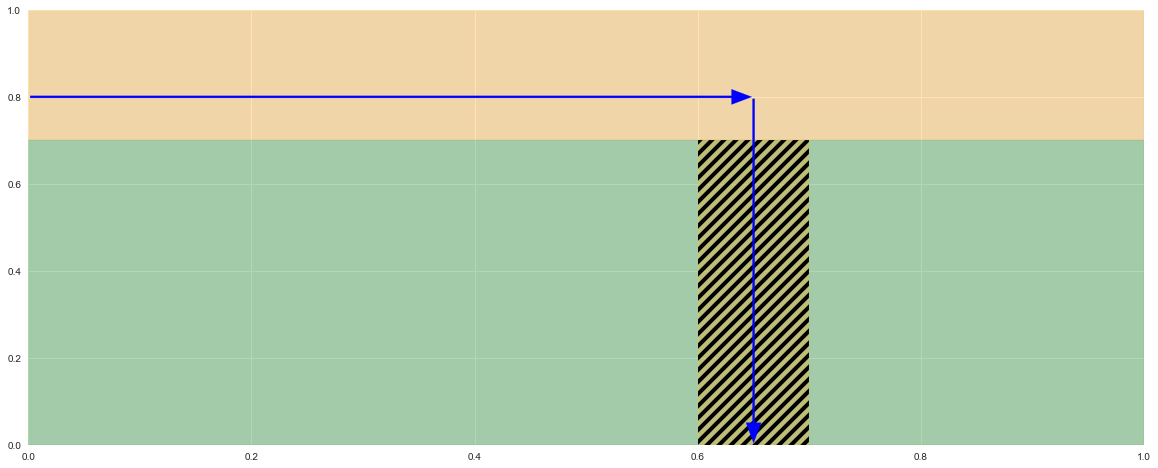

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seaborn

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1, 1, 1)
amber_area = plt.Rectangle((0., 0.7), 1, 0.3, color='orange', alpha=0.3)
#amber_area = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='orange', alpha=0.3)
green_area = plt.Rectangle((0., 0.), 1, 0.7, color='green', alpha=0.3)

plt.rcParams["hatch.linewidth"] = 4
crossing_area = plt.Rectangle((0.6,0.),.1,.7, facecolor="orange", 
                     edgecolor="gold", hatch=r"//",alpha=0.3)


ax.add_patch(green_area)
ax.add_patch(amber_area)
ax.add_patch(crossing_area)

style="Simple,tail_width=2,head_width=15,head_length=20"
kw = dict(arrowstyle=style, color="blue")

a1 = patches.FancyArrowPatch((0,0.8), (0.65,0.8),**kw )
a2 = patches.FancyArrowPatch((0.65,0.8), (0.65,0),**kw)
plt.gca().add_patch(a1)
plt.gca().add_patch(a2)


<p>The crossing volume is assumed to be the most direct route to the ground and forms a corridor of possible interaction. The interacting cross-section of the corridor is effectively the width of the BVLOS UAS plus the VLOS UAS</p>
<p>$A_{cross}=(S_{BVLOS}+S_{VLOS})^2$.</p>

<p>The total airspace occupancy of BVLOS flight is thus the total number of BLVOS entering green U-space mulitplied by this cross-sectional area</p>

$occupancy = N_{BVLOS} \times (S_{BVLOS}+S_{VLOS})^2$.

<p>As we assume the VLOS flight can be randomly distributed in green airspace, the total occupancy must be a small fraction of the total area to prevent any collision. Therefore the probability that a N_{VLOS} is within corridor is:</p>

$P= N_{VLOS}\times\frac{\rm{occupancy}}{\rm{green\ volume}}$,
<p>where we can define the VLOS density as $\rho_{VLOS}=N_{VLOS}/\rm{green\ volume}$ to give</p>

$\rho_{VLOS}=\frac{P}{N_{BVLOS}(S_{VLOS}+S_{BVLOS})^2}$.

<p> We then consider the collision conditions for the set: $P=\{0.01,0.001,0.0001\}$.</p>


## Input parameters

In [4]:
# Let's assume the VLOS is a DJI Phantom (590mm) and the BVLOS is twice as big
S_v = 0.59 # size of vlos in metres
S_b = 2*0.59 # size of bvlos in metres

# Vary the total (daily) BVLOS from 1 to 70,000:
import numpy as np
N_BVLOS = np.arange(1,7e4,1)

# Probabiltiy of collision:
p=[0.01,0.001,0.0001] 

## Plotting

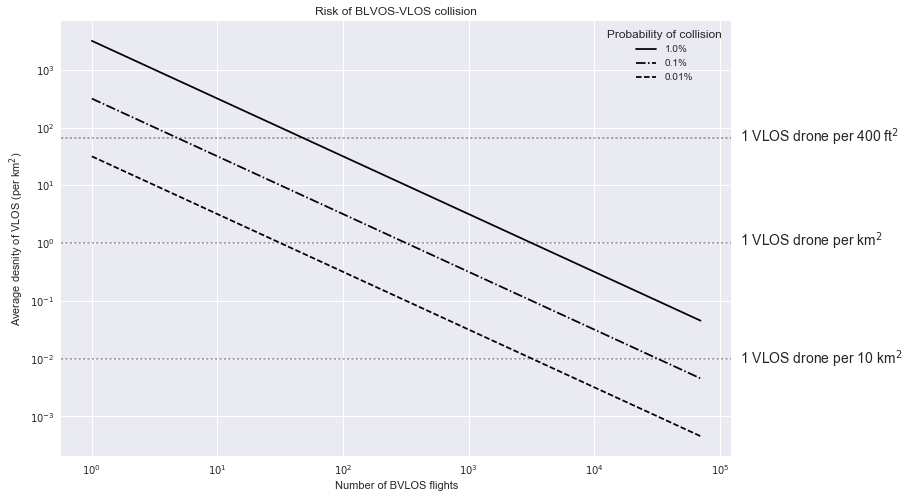

In [13]:
occupancy = N_BVLOS*(S_v+S_b)**2 
occupancy = occupancy / 1e6 # Convert m^2 -> km^2 

plt.figure(figsize=(12,8))
plt.loglog(N_BVLOS,p[0]/occupancy,label="{}%" .format(100*p[0]),ls='-', c='k')
plt.loglog(N_BVLOS,p[1]/occupancy,label="{}%" .format(100*p[1]),ls='-.', c='k')
plt.loglog(N_BVLOS,p[2]/occupancy,label="{}%" .format(100*p[2]),ls='--', c='k')
plt.axhline(0.122**-2,ls=':',c='k',alpha=0.35) # One drone per 122m^3
plt.axhline(1**-2,ls=':',c='k',alpha=0.35) # One drone per 1km^3
plt.axhline(10**-2,ls=':',c='k',alpha=0.35) # One drone per 4km^3  
plt.xlabel("Number of BVLOS flights")
plt.ylabel("Average desnity of VLOS (per km$^2$)")
plt.legend(title="Probability of collision")
plt.title("Risk of BLVOS-VLOS collision")

plt.gcf().text(0.91, 0.67, '1 VLOS drone per 400 ft$^2$', fontsize=14)
plt.gcf().text(0.91, 0.49, '1 VLOS drone per km$^2$', fontsize=14)
plt.gcf().text(0.91, 0.285, '1 VLOS drone per 10 km$^2$', fontsize=14)

plt.show()

## Limitations

<p> UAS or drones are not flown in uniformed densities and will cluster around points of interest (PoIs).</p>